# Riddles

In [3]:
from pathlib import Path

In [4]:
p = Path('/Users/olli/Desktop/PythonNotebooks')
sub_dir = 'pics'
pics = p/sub_dir
pics

WindowsPath('/Users/olli/Desktop/PythonNotebooks/pics')

* Relate the problem to a fundamental data structure or algorithm 
* Break down the problem

# Bridge Crossing - SOLUTION

Recursion 

## Problem Statement

A group of four travelers comes to a bridge at night. The bridge can hold the weight of at most only **two of the travelers at a time**, and it can- not be crossed without using a flashlight. 

The travelers have one flashlight among them. Each traveler walks at a different speed: The first can cross the bridge in 1 minute, the second in 2 minutes, the third in 5 minutes, and the fourth takes 10 minutes to cross the bridge. If two travelers cross together, they **walk at the speed of the slower traveler**.

What is the **least amount of time** in which all the travelers can cross from one side of the bridge to the other?

## Solution

This is part of a common group of [river crossing](https://en.wikipedia.org/wiki/River_crossing_puzzle) puzzles. Its know as the [Bridge and Torch problem](https://en.wikipedia.org/wiki/Bridge_and_torch_problem) (sometimes the times assigned to each person are different).

The solution to this version is:
<table class="p4table width50">
<tr><th>Move</th><th>Time</th>
</tr>
<tr><td>(1) &amp; (2) Cross with Torch</td><td>2</td>
</tr>
<tr><td>(1) Returns with Torch</td><td>1</td>
</tr>
<tr><td>(5) &amp; (10) Cross with Torch</td><td>10</td>
</tr>
<tr><td>(2) Returns with Torch</td><td>2</td>
</tr>
<tr><td>(1) &amp; (2) Cross with Torch</td><td>2</td>
</tr>
<tr><td>&nbsp;</td><th>17</th></tr>
</table>

# Coins and a Scale - SOLUTION

Divide and Conquer 

## Problem Statement

You have eight coins and a two-pan scale. All the coins weigh the same, **except for one** which is heavier than all the others. The coins are otherwise indistinguishable. You may make no assumptions about how much heavier the heavy coin is. What is the minimum number of weighings needed to be certain of identifying the heavy coin?

## Solution

Begin by dividing the coins into: 
* two groups of three, which you put on the scale, 
* and one group of two, which you leave off. 
* If the two sides weigh the same, the heavy coin is in the group of two, and you can find it with one more weighing, for a total of two weighings. 
* On the other hand, if either side of the scale is heavier, the heavy coin must be in that group of three. You can eliminate all the other coins, and place one coin from this group on either side of the scale, leaving the third coin aside. If one side is heavier, it contains the heavy coin; if neither side is heavier, the heavy coin is the one you didn’t place on the scale. This is also a total of two weighings, **so you can always find the heavy coin in a group of eight using two weighings**.

# Egg Drop - SOLUTION

Binary Search 

This is probably the most common brain teaser riddle out of the group, so really try to think algorithmically about this problem before looking at the solution!

## Problem Statement

A tower has 100 floors. You've been given two eggs. The eggs are strong enough that they can be dropped from a particular floor in the tower without breaking. You've been tasked to find the highest floor an egg can be dropped without breaking, in as few drops as possible. If an egg is dropped from above its target floor it will break. If it is dropped from that floor or below, it will be intact and you can test drop the egg again on another floor.

Show algorithmically how you would go about doing this in as few drops as possible. (Your answer should be a number of the fewest drops needed for testing 2 eggs on 100 floors)
## Solution

Start from the 10th floor and go up to floors in multiples of 10.

If first egg breaks, say at 20th floor then you can check all the floors between 11th and 19th with the second egg to see which floor it will not break.

In this case, the worst-case number of drops is 19. If the threshold was 99th floor, then you would have to drop the first egg 10 times and the second egg 9 times in linear fashion.

**Best solution:**
We need to minimize this worst-case number of drops. For that, we need to generalize the problem to have n floors. What would be the step value, for the first egg? Would it still be 10? Suppose we have 200 floors. Would the step value be still 10? 

The point to note here is that we are trying to minimize the worst-case number of drops which happens if the threshold is at the highest floors. So, our steps should be of some value which reduces the number of drops of the first egg.

Let's assume we take some step value m initially. If every subsequent step is m-1,
then, 
$$m+m−1+m−2+.....+1=n$$

This is 

$$\frac{m∗(m+1)}{2}=n$$

If n =100, then m would be 13.65 which since we can't drop from a decimal of a floor, we actually use 14.

So, the worst case scenario is now when the threshold is in the first 14 floors with number of drops being 14.

Note that this is simply a **binary search**!

___
You can find plenty of other explanations by simply googling "2 eggs 100 floors"

# Hallway Lockers - SOLUTION
## Problem Statement

You are in a hallway lined with 100 lockers. You start with one pass and open the lockers, so that the *opened* lockers are now with their doors opened out. You begin by closing **every second** locker. Then you go to close **every third** locker and **close it if it is open or open it if it’s closed** — we will refer to this as "toggling" the lockers. You continue toggling every nth locker on pass number n. After your hundredth pass of the hallway, in which you toggle only locker number 100, how many lockers are open?

## Solution

Obviously you can't just brute force and count out this problem, there are just too many passes, so we will need to think about this algorithmically.

Let's begin solving this problem by choosing an arbitrary locker and see if we can detect a pattern. Let's choose locker 12, it has been toggled open on your first pass.

To start off we know we won't have to toggle it on any pass greater than 12. So now we only have to think of the passes that occur on 2-11. We can actualy count these out:

* On pass 2: 2,4,6,8,10,12
* On pass 3: 3,6,9,12
* On pass 4: 4,8,12
* On pass 5: 5,10 **No toggle on this pass**
* On pass 6: 6,12
* On pass 7: 7,14 **No toggle on this pass**
* ect...

You'll notice the pattern that emerges, we only toggle the locker when the pass number is a factor of the locker number. We can begin to make the generalization that all lockers started open after the first pass and alternate between being open and closed. So lockers are closed after the second, fourth, sixth, and so on, times they are toggled — in other words, if a locker is toggled an even number of times, then it ends closed; otherwise, it ends open. You know that a locker is toggled once for every factor of the locker number, so you can say that a locker ends open only if it has an odd number of factors.

**The task has now been reduced to finding how many numbers between 1 and 100 have an odd number of factors!**
____

We can think about this in the following manner:

If a number **i** is a factor of **n**, what does that mean? It means that **i** times some other number **j** is equal to n. Because multiplication is commutative (i × j = j × i), that means that j is a factor of n, too, so the number of factors is usually even because factors tend to come in pairs. If you can find the numbers that have unpaired factors, you will know which lockers will be open. Multiplication is a binary operation, so two numbers will always be involved, but what if they are both the same number (that is, i = j)? In that case, a single number would effectively form both halves of the pair, and there would be an odd number of factors. When this is the case, i × i = n. Therefore, n must be a perfect square. Try a perfect square to check this solution. For example,
for 16, the factors are 1, 2, 4, 8, 16; operations are open, close, open, close, open — as expected, it ends open.

Based on this reasoning, you can conclude that only lockers with numbers that are perfect squares end up open. The perfect squares between 1 and 100 (inclusive) are 1, 4, 9, 16, 25, 36, 49, 64, 81, and 100. So 10 lockers would remain open.

# Jugs of Water - SOLUTION
## Problem Statement

You have a five gallons jug and a three gallons jug, and an unlimited supply of water (but no measuring cups) How would you come up with exactly four gallons of water?

## Solution

This problem has a cameo in the movie Die Hard 3. The solution is below:

In [5]:
from IPython.display import Image
Image(url='http://mindyourdecisions.com/blog/wp-content/uploads/2013/02/water-jug-riddle-1.png')

Hopefully your interviews are not as stressful as this:

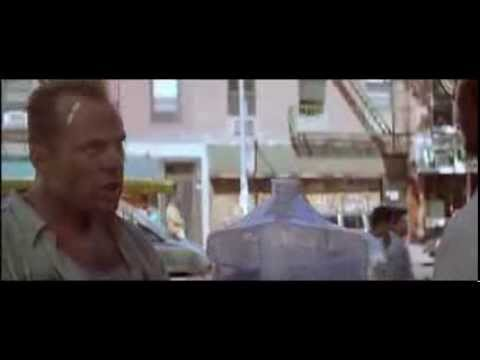

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('BVtQNK_ZUJg')

# Yippee Ki Yay

# Ropes Burning - SOLUTION
## Problem Statement

You have two ropes. Each takes exactly 60 minutes to burn.

They are made of different material so even though they take the same amount of time to burn, they burn at separate rates. In addition, each rope burns inconsistently.

How do you measure out exactly 45 minutes?

## Solution

Take one rope and burn it at both ends.

At the same time, burn one end of the other rope.

When the first rope finishes burning, light the other end of the remaining rope.

When it burns out, that's 45 minutes.